The Ackley function is widely used for testing optimization algorithms. In it two dimensional form, as shown in the plot below, it is characterized by a nearly flat outer region, and a large hole at the centre. The function poses a risl for optimization algorithms, particularly hillclimbing algorithms, to be trapped in one of its many local minima.

$f(\mathbf{x}) = -a\exp(-b \sqrt{\frac{1}{d}\Sigma_{i=1}^{d}x_i^2}) - \exp(\frac{1}{d}\Sigma_{i=1}^{d}\cos(cx_i)) + a + \exp(1)$ 

In [31]:
import numpy as np

a = 20
b = 0.2
c = 2 * np.pi

def f(x, y):
    return -a * np.exp(-b * np.sqrt((x**2 + y**2) / 2)) - np.exp((np.cos(c*x) + np.cos(c*y)) / 2) + a + np.exp(1)

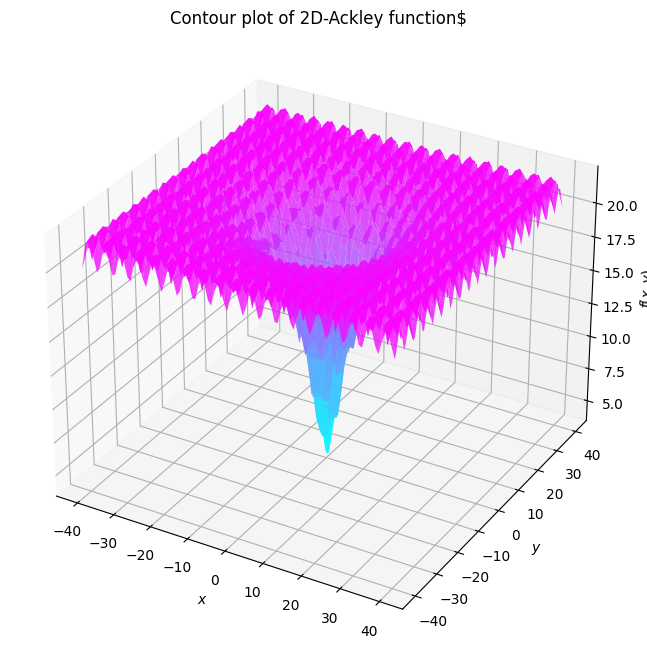

In [44]:
import matplotlib.pyplot as plt

x1_vals = np.linspace(-40, 40, 100)
x2_vals = np.linspace(-40, 40, 100)

x1, x2 = np.meshgrid(x1_vals, x2_vals)
z = f(x1, x2)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z, cmap='cool', alpha=0.8)
ax.set_title('Contour plot of 2D-Ackley function$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')
plt.show()

# 1.

_Exercise: Implement Gradient Descent(GD) Algorithm (Compute gradient using theory or Numerical Gradient) to minimize the function given above. You can use certain error tolerance/difference between $x_{k+1}$ to $x_k$ to stop the gradient descent_
* _Experiment GD with fixed alphas and different intialization. (You are expected to replicate the results given in figure-2)_
* _Implement GD with backtracking and experiment with different $C_1$ and $\rho$ values._
* Compare both.

In [41]:
# taken from assignment-1

def numericalGrad(funObj, w, epsilon):
    m = len(w)
    grad = np.zeros(m)
    for i in range(m):
        wp = np.copy(w)
        wn = np.copy(w)
        wp[i] = w[i] + epsilon
        wn[i] = w[i] - epsilon
        grad[i] = (funObj(wp) - funObj(wn))/(2*epsilon)
    return grad

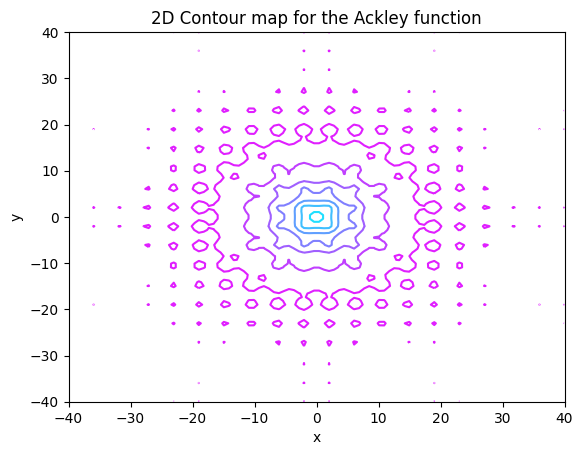

In [52]:
plt.figure()
contour_plot = plt.contour(x1, x2, z, cmap='cool')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Contour map for the Ackley function')
plt.show()

In [ ]:
alpha = 0.001
xs = [0.61, 0.61, 0.61, 0.62]
ys = [0.72, 0.72, 0.73, 0.76]

